# Motivation

*https://www.youtube.com/watch?v=m41DWardioc

In the video linked above the lecturer alludes to practices in field ecology of counting species in an area of a particular size and then areas of larger and larger size and defining a relationship between the number of species found at successively larger sizes. The lecturer states that that relationship can be modelled as a power law and that generally (or at least in many cases) the relationship follows 

`n = c(A^z)` where 
* n is the number of species
* c is some constant
* A is the area
* z is usually around 1/4

# Purpose

In this notebook we attempt to attempt to replicate a similar relationship using species population data generated from a simple 'break the stick' model and location data generated purely randomly.

# Method

Specifically, we generate a multi-species population of one million indviduals with the break-the-stick model. We then assign them coordinates in a 2D plane. We iterate over possible successively larer values for the sample area and count the number of distinct species we find in each. We plot a line of the counts found to the area.

# Conclusion

If we compare the plot of the break-the-stick model with that of the `n=c(A^(1/4))` model we can see some similarity in shape but our model finds more species in smaller areas. To make the power law model fit to the break the stick model the power has to be much smaller i.e. 

In [2]:
# code for break-the-stick model

import random
import copy
import math

from collections import namedtuple, Counter
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt


segment = namedtuple('Segment', ['start', 'end'])


def do_break_int_sizes(s):
    if s.end-s.start == 1:
        return [s]
    seg_break = random.randint(1, s.end - s.start - 1)
    marker = s.start + seg_break
    return [segment(s.start, marker), segment(marker, s.end)]
    

def break_stick(stick, break_cycles, p_break, break_function=do_break_int_sizes):
    '''
    stick: is a list of segments
    break_cycles: max number of iterations of breaks a stick will undergo
    p_break: probability a segment breaks at all at any iteration
    '''
    stick = copy.deepcopy(stick)
    while break_cycles > 0:
        next_stick = []
        change_made = False
        for segment in stick:
            if random.random() < p_break:
                change_made = True
                next_stick.extend(break_function(segment))
            else:
                next_stick.append(segment)
        if not change_made:
            return stick
        stick = next_stick
        break_cycles -= 1
    return stick

In [31]:

def generate_locations(species):
    individual_locations = []
    for sp_num, sp in enumerate(species):
        for i in range(sp.start, sp.end):
            individual_locations.append( (sp_num, random.random(), random.random()) )
    return individual_locations


In [27]:
def calc_species_in_bounds(individual_locations):
    species_in_bounds = []
    for bound in range(1, 1000, 1):
        bound = bound/1000
        found = set()
        count_species = 0
        for indiv in individual_locations:
            if indiv[1] < bound and indiv[2] < bound:
                if indiv[0] not in found:
                    found.add(indiv[0])
                    count_species += 1
        species_in_bounds.append((bound, count_species))
    return species_in_bounds


In [48]:
import matplotlib.pyplot as plt

def plot_species_by_bounds_area(species_in_bounds):
    fig, ax = plt.subplots()
    ax.plot(
        [x[0] for x in species_in_bounds], 
        [x[1] for x in species_in_bounds])
    ax.set_title("species in bounds")
    ax.set_xlabel('bounds size')
    ax.set_ylabel('number of species')
    plt.show()

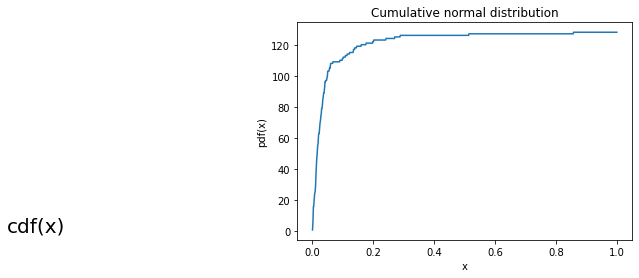

In [23]:
# 1000000 individuals in the population
species = break_stick([segment(0, 1000000)], 7, 1.0)

plot_species_by_bounds_area(calc_species_in_bounds(generate_locations(species)))

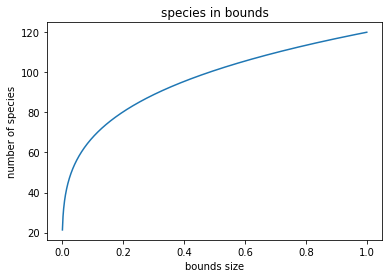

In [49]:
species = [(x, 120*(x**(1/4))) for x in [a/1000 for a in range(1, 1000)]]
plot_species_by_bounds_area(species)